In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

import seaborn as sns

df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
print(df.info())
print(df.isnull().sum())
print(df['species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: >

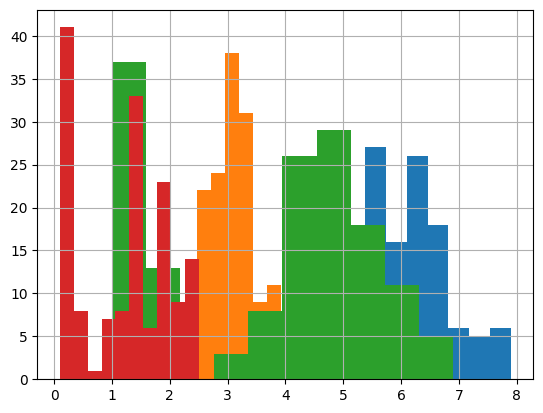

In [4]:
df['sepal_length'].hist()
df['sepal_width'].hist()
df['petal_length'].hist()
df['petal_width'].hist()

In [5]:
colors=['red', 'orange', 'blue']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

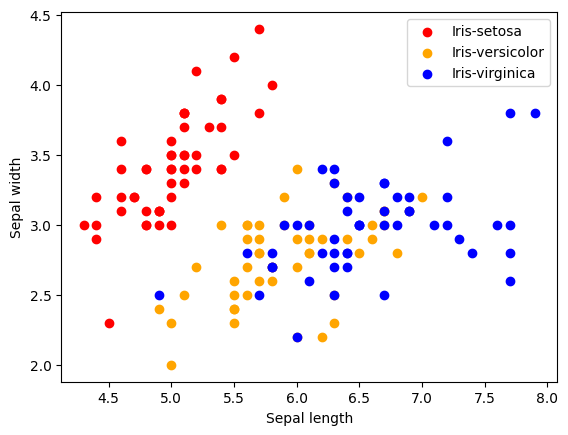

In [6]:
for i in range(3):
    X = df[df['species'] == species[i]]
    plt.scatter(X['sepal_length'], X['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

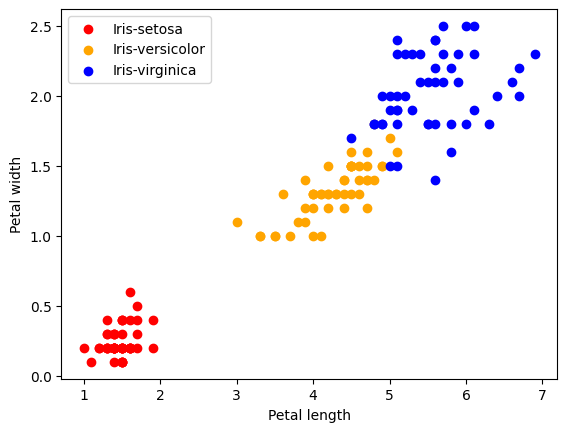

In [7]:
for i in range(3):
    X = df[df['species'] == species[i]]
    plt.scatter(X['petal_length'], X['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

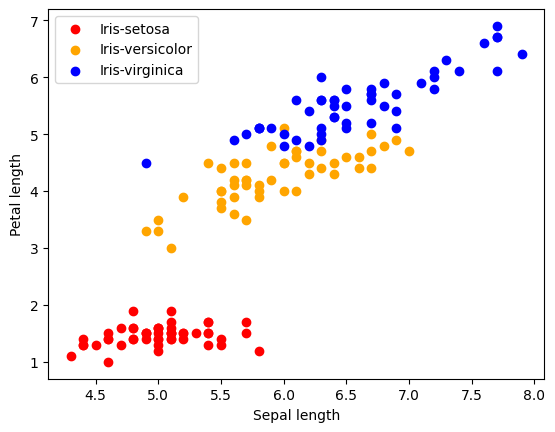

In [8]:
for i in range(3):
    X = df[df['species'] == species[i]]
    plt.scatter(X['sepal_length'], X['petal_length'], c=colors[i], label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()

In [9]:
# corellation matrix
corr = df.drop(columns = 'species').corr()
print(corr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

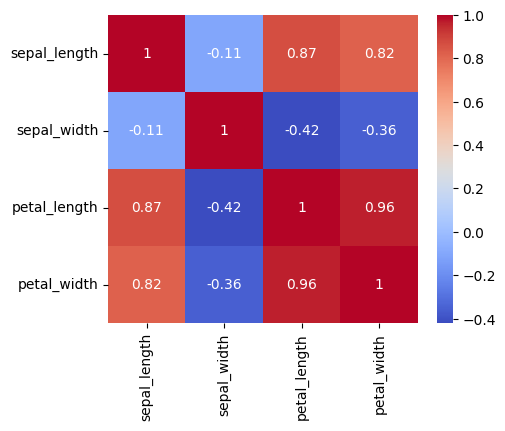

In [10]:
# correlation matrix in a heatmap form

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [11]:
# label encoding
le = LabelEncoder()

df['species'] = le.fit_transform(df['species'])


In [12]:
# model training

#train - 70%
#test  - 30%
X = df.drop(columns='species')
y = df['species']

In [13]:
# preproccessing
X = StandardScaler().fit_transform(X)
print(X[0:4])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]]


In [14]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70)

In [15]:
# Training and predicting
from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)
y_predict = knnmodel.predict(X_test)

In [16]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict)
print(acc)
print(int(acc * 1000) / 10)

0.9142857142857143
91.4


In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, y_predict)
print(cm)

[[33  0  0]
 [ 0 32  4]
 [ 0  5 31]]


In [18]:
# Prettier Confustion Matrix
confusionMatrix = pd.DataFrame(data=cm, index=['Setosa', 'Versicolor', 'Virginica'], columns=['Setosa', 'Versicolor', 'Virginica'])
print(confusionMatrix)

            Setosa  Versicolor  Virginica
Setosa          33           0          0
Versicolor       0          32          4
Virginica        0           5         31


In [19]:
# Actual value vs. prediction
value_prediction = pd.DataFrame(data = [y_test.values, y_predict], index=['y_test', 'y_predict'])
value_prediction.transpose()
print(value_prediction)

           0    1    2    3    4    5    6    7    8    9    ...  95   96   \
y_test       0    1    0    0    0    0    0    1    2    2  ...    0    1   
y_predict    0    1    0    0    0    0    0    1    2    1  ...    0    1   

           97   98   99   100  101  102  103  104  
y_test       2    1    2    1    1    1    2    1  
y_predict    2    2    2    1    1    1    2    2  

[2 rows x 105 columns]


In [20]:
# Shortened output
print(value_prediction.iloc[0,:].value_counts())

y_test
1    36
2    36
0    33
Name: count, dtype: int64
